# Continuous Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

### TL;DR
How to detect anomalies/outliers in continuous data:
- Visualize
- Use Z-score (for normally distributed data)
- Use IQR method 


### Visualize:

#### Ascombe's Quartet:

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

df = pd.read_csv(url)

In [3]:
# peek at the head, what this data set looks like
df.head()

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33


In [4]:
# check out the stats with a .describe()
df.groupby('dataset')[['x', 'y']].describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

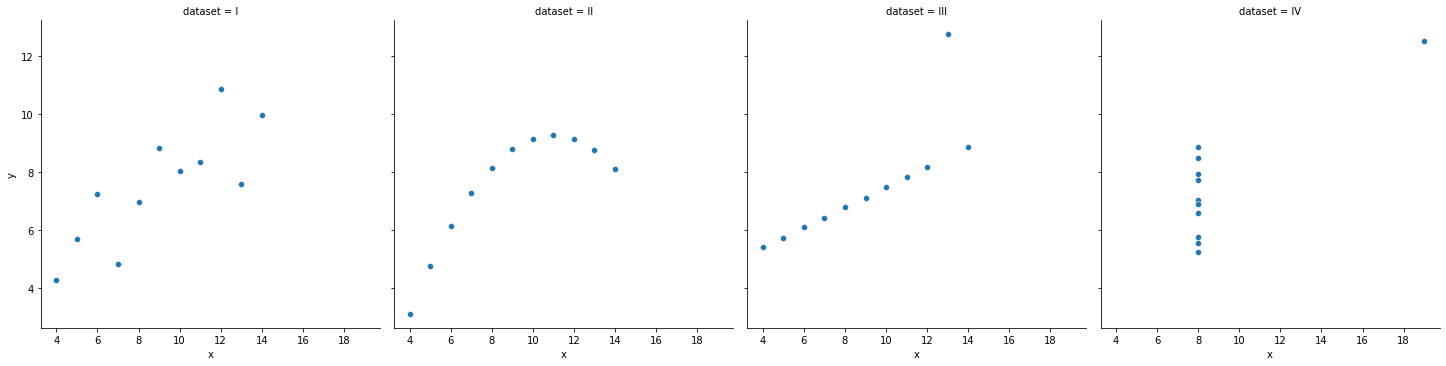

In [5]:
# plot the data
sns.relplot(x='x', y='y', col='dataset', data=df)

In [6]:
# load up the swiss data set
df = data('swiss')

In [7]:
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [8]:
# get the stats via describe
df.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


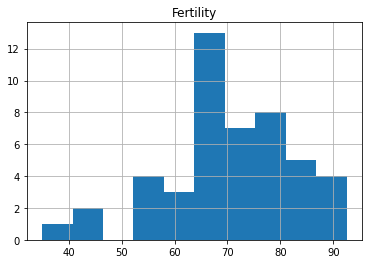

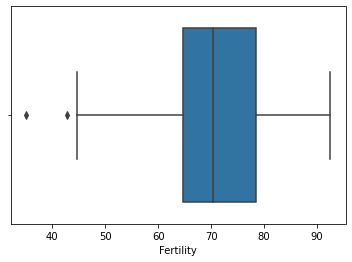

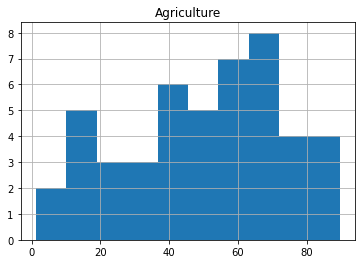

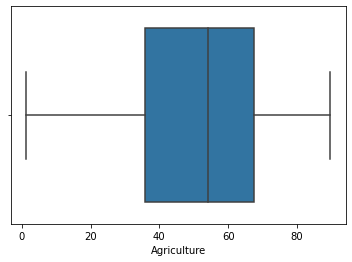

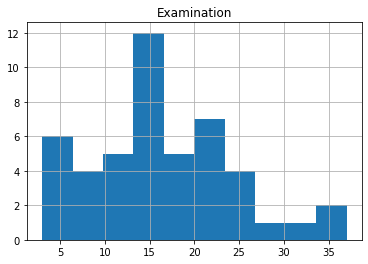

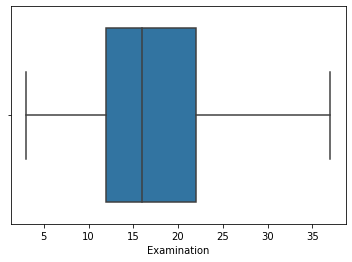

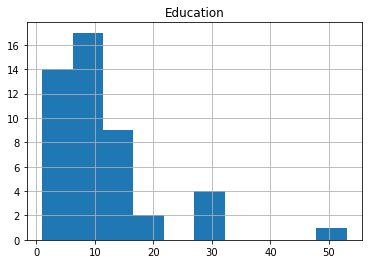

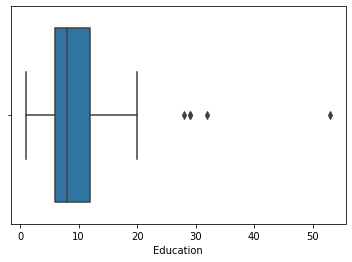

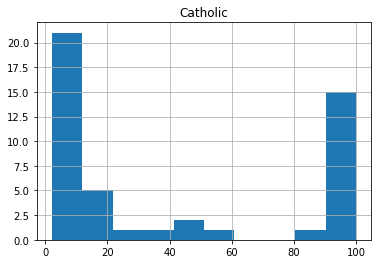

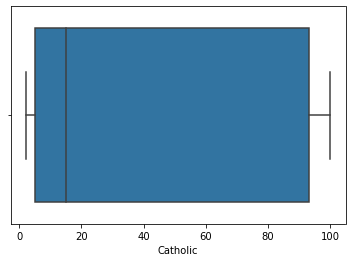

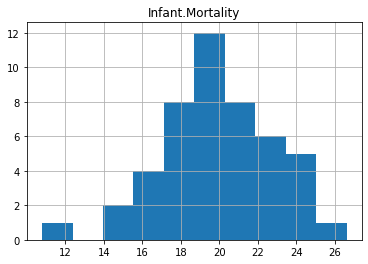

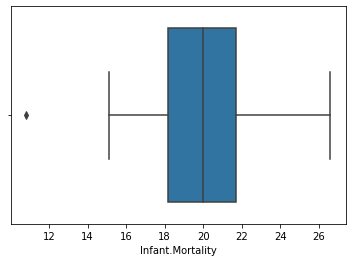

In [10]:
# iterate through columns and create histograms
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()

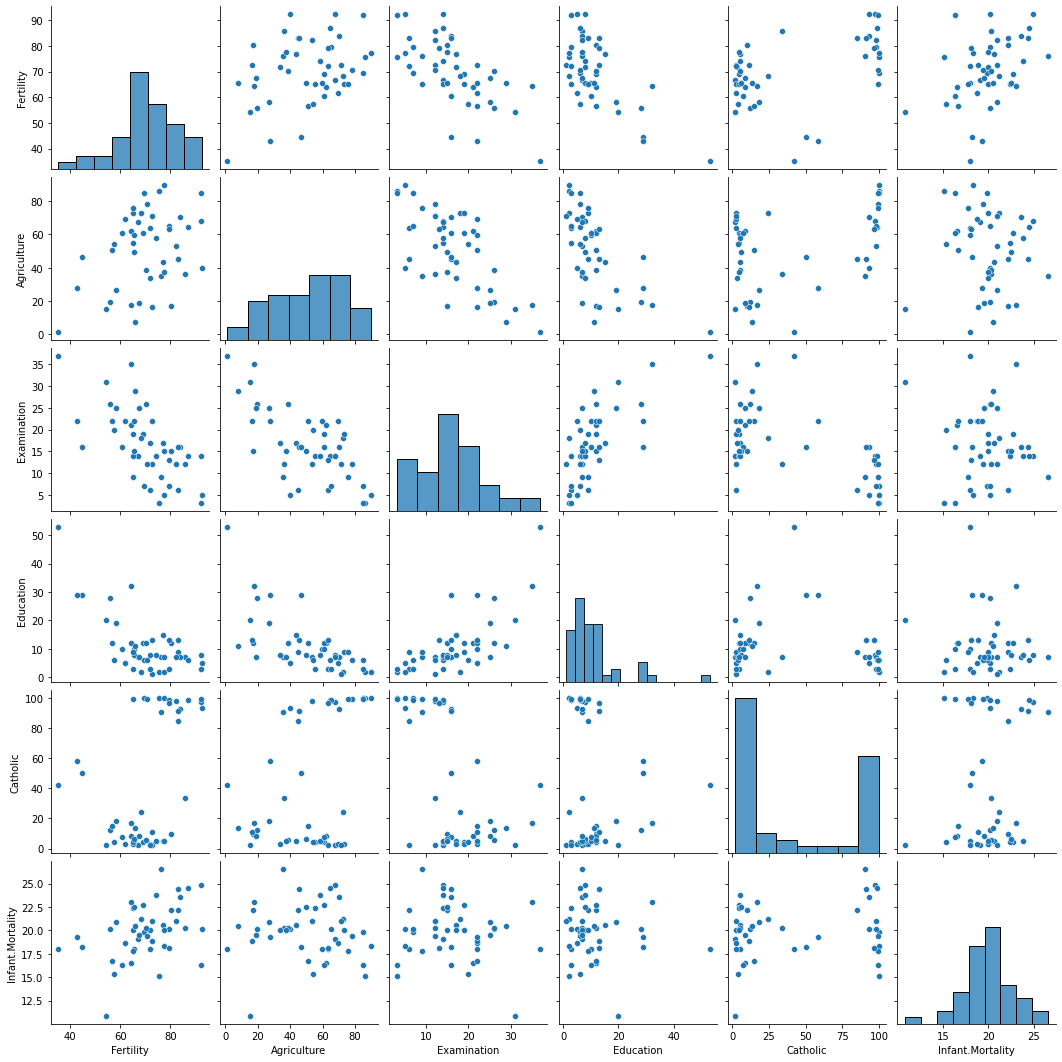

In [11]:
sns.pairplot(df)

### Using Z-score
- How far is an observation from mean?

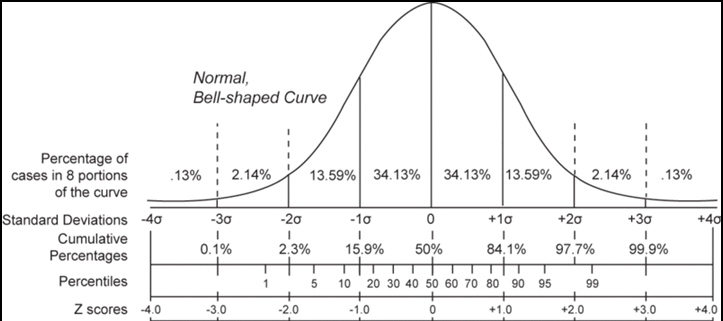

source: https://en.wikipedia.org/wiki/File:Normal_distribution_and_scales.gif

### Exponential Tails of the Normal Distribution
| Range | Expected Fraction of Population Inside Range | Approximate Expected Frequency Outside Range | Approximate frequency for daily event |
| ----- | -------------------------------------------- | -------------------------------------------- | -------------------------------------------- |
| μ ± 0.5σ | 0.382924922548026                            | 2 in 3 |Four or five times a week|
| μ ± σ | 0.682689492137086 | 1 in 3 |Twice a week|
| μ ± 1.5σ | 0.866385597462284 | 1 in 7 |Weekly|
| μ ± 2σ | 0.954499736103642 | 1 in 22 |Every three weeks|
| μ ± 2.5σ | 0.987580669348448 | 1 in 81 |Quarterly|
| μ ± 3σ | 0.997300203936740 | 1 in 370 |Yearly|
| μ ± 3.5σ | 0.999534741841929 | 1 in 2149 |Every 6 years|
| μ ± 4σ | 0.999936657516334 | 1 in 15,787 |Every 43 years|
| μ ± 4.5σ | 0.999993204653751 | 1 in 147,160 |Every 403 years|
| μ ± 5σ | 0.999999426696856 | 1 in 744,278 |Every 4776 years|
| μ ± 5.5σ | 0.999999962020875 | 1 in 26,330,254 |Every 72,090 years|
| μ ± 6σ | 0.999999998026825 | 1 in 506,797,346 |Every 1.38 million years|

### Beware: "Black Swan" events

- Phenomenally low frequency events that have an exponentially powerful impact
- Is outlier (outside the realm of our expectation)
- Has major impact
- predictable (atleast in hindsight)
- Examples ?

In [12]:
# z-score:
# subtract from the mean, divide by the standard deviation
# i.e (x - x_mean) / x_std

df['inf_mort_zs'] = ((df['Infant.Mortality'] - df['Infant.Mortality'].mean())
                     / df['Infant.Mortality'].std())
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,inf_mort_zs
Courtelary,80.2,17.0,15,12,9.96,22.2,0.775037
Delemont,83.1,45.1,6,9,84.84,22.2,0.775037
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,0.088388
Moutier,85.8,36.5,12,7,33.77,20.3,0.122720
Neuveville,76.9,43.5,17,15,5.16,20.6,0.225718


In [13]:
# Which provinces have very high/low infant mortality

df[df['inf_mort_zs'].abs() >= 3]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,inf_mort_zs
La Vallee,54.3,15.2,31,20,2.15,10.8,-3.138862


### Using IQR

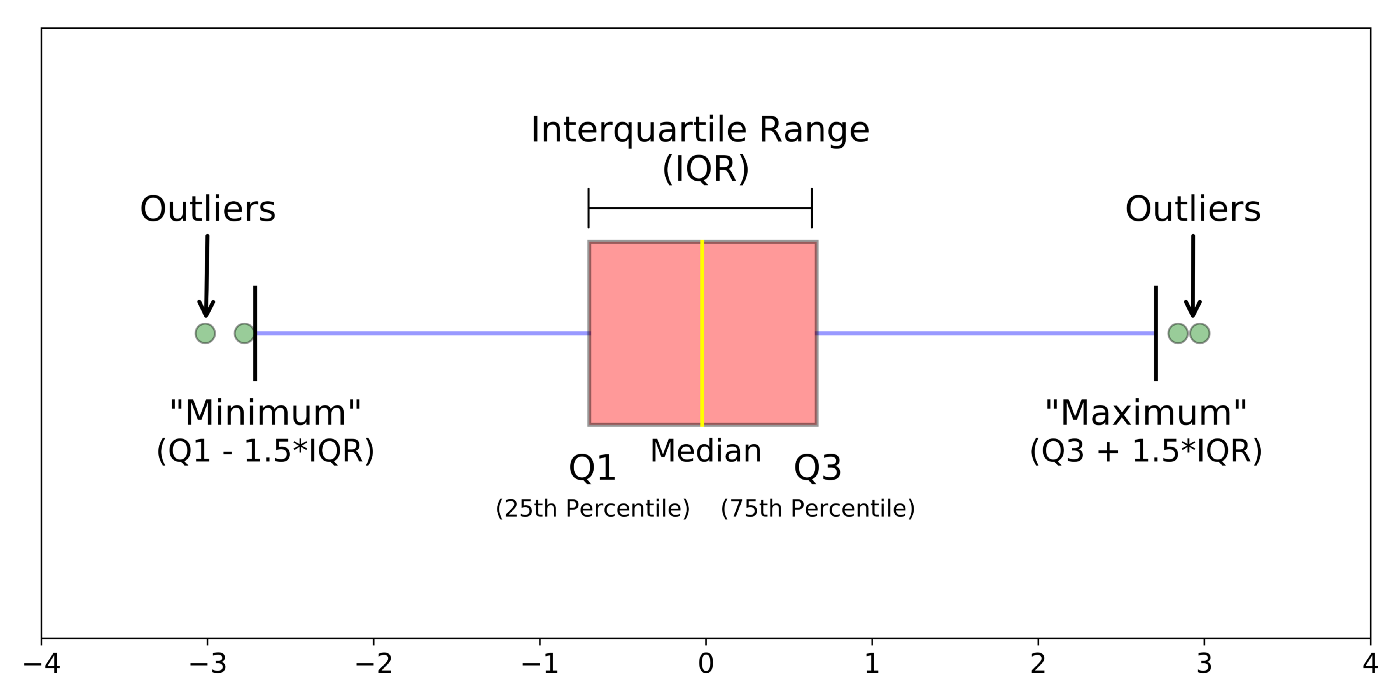

source: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [14]:
# steps to defining IQR/Tukey method:
# get the Q1 and Q3 values
# determine our multiplier
# use these qualities to assert abnormalities

In [15]:
# infant mortality
multiplier = 1.5
q1 = df['Infant.Mortality'].quantile(0.25)
q3 = df['Infant.Mortality'].quantile(0.75)

In [16]:
# calculate iqr
iqr = q3 - q1

In [17]:
# calculate upper and lower limits for the whiskers
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

In [18]:
# which observations in dataframe are outliers based on IQR rule?
df[(df['Infant.Mortality'] < inner_lower_fence) | (df['Infant.Mortality'] > inner_upper_fence)]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,inf_mort_zs
La Vallee,54.3,15.2,31,20,2.15,10.8,-3.138862


# Exercises

### 1. Using lemonade.csv dataset and focusing on continuous variables:

In [19]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)

In [20]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [24]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


**Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?**

In [28]:
q1 = df.Temperature.quantile(0.25)

q3 = df.Temperature.quantile(0.75)

iqr = q3 - q1

multiplier = 1.5
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Temperature'] < inner_lower_fence) | (df['Temperature'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [29]:
inner_lower_fence, inner_upper_fence

(16.700000000000003, 104.7)

In [30]:
q1 = df.Rainfall.quantile(0.25)

q3 = df.Rainfall.quantile(0.75)

iqr = q3 - q1

multiplier = 1.5
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Rainfall'] < inner_lower_fence) | (df['Rainfall'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


In [31]:
inner_lower_fence, inner_upper_fence

(0.26, 1.3)

In [35]:
q1 = df.Flyers.quantile(0.25)

q3 = df.Flyers.quantile(0.75)

iqr = q3 - q1

multiplier = 1.5
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Flyers'] < inner_lower_fence) | (df['Flyers'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [36]:
inner_lower_fence, inner_upper_fence

(4.0, 76.0)

In [37]:
q1 = df.Price.quantile(0.25)

q3 = df.Price.quantile(0.75)

iqr = q3 - q1

multiplier = 1.5
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Price'] < inner_lower_fence) | (df['Price'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [40]:
inner_lower_fence, inner_upper_fence

(0.5, 0.5)

In [41]:
q1 = df.Sales.quantile(0.25)

q3 = df.Sales.quantile(0.75)

iqr = q3 - q1

multiplier = 1.5
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

df[(df['Sales'] < inner_lower_fence) | (df['Sales'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


In [42]:
inner_lower_fence, inner_upper_fence

(5.0, 45.0)

### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

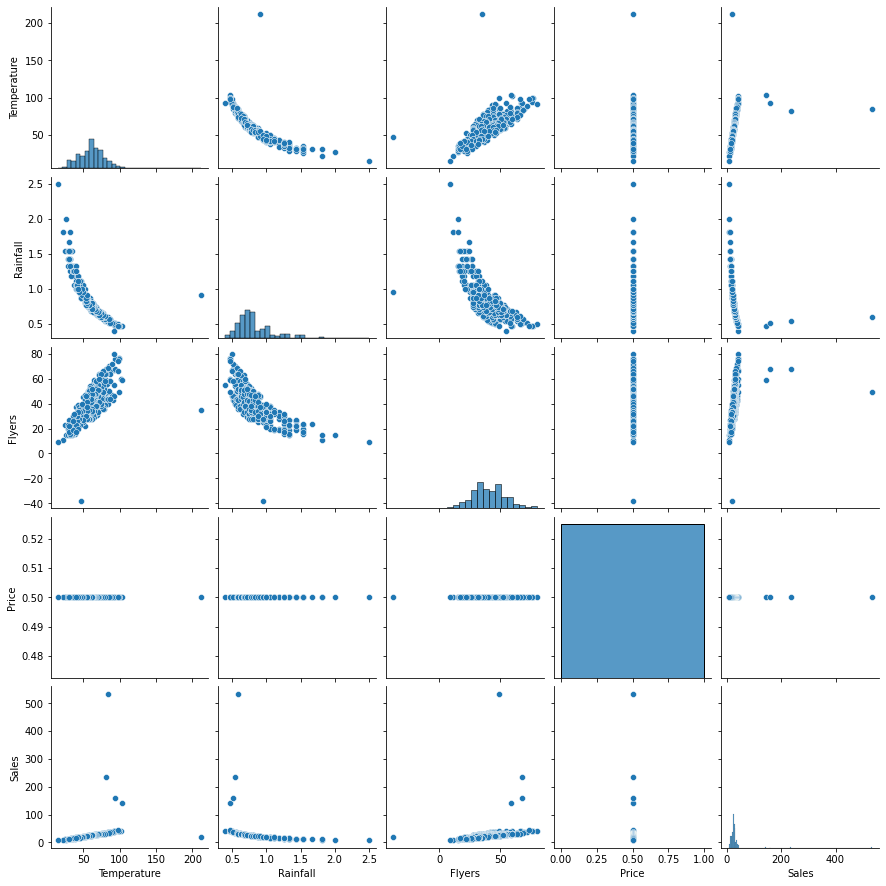

In [38]:
sns.pairplot(df)

Date


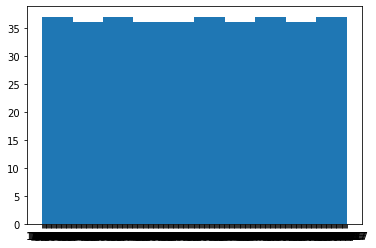

Day


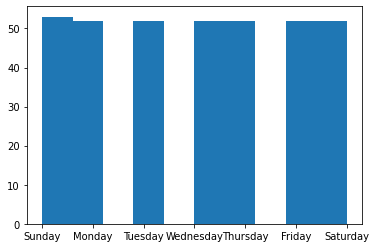

Temperature


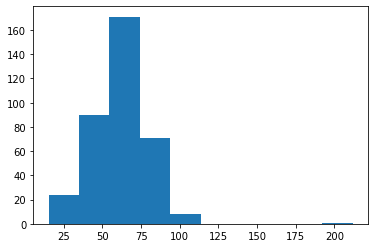

Rainfall


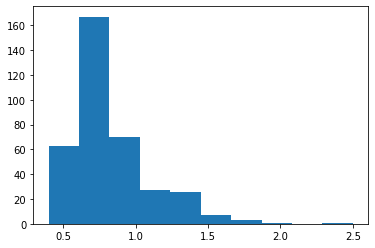

Flyers


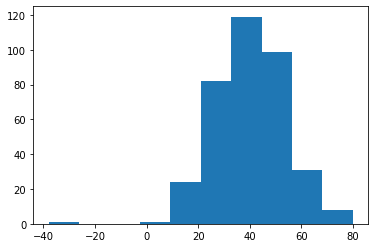

Price


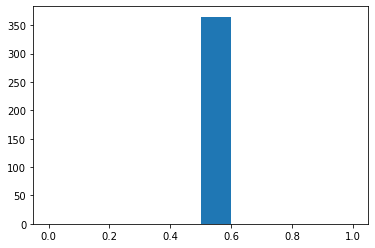

Sales


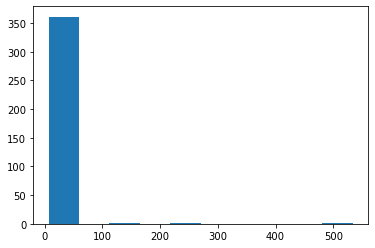

In [39]:
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.show()

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv